# PHYS 210, Homework 15
Due Wed, Oct 29, 2025 at the start of class on Canvas

## *1. Monte Carlo accuracy*

We are going to use the idea of replications to investigate the accuracy of Monte Carlo simulation results. To do this we are going to look at sampling a gaussian with a mean of 0 and standard deviation of 1 using `np.random.randn()`.

The `gaussian_stats(N)` code below samples a Guassian distribution 10,000 times, creates a histogram, and returns the mean and standard deviation of this distribution. The code that is used below to call this function also prints out the mean and standard deviation.

Effectively, what we are doing here is sampling a Gaussian distribution (with a mean of zero) so that we can estimate zero.

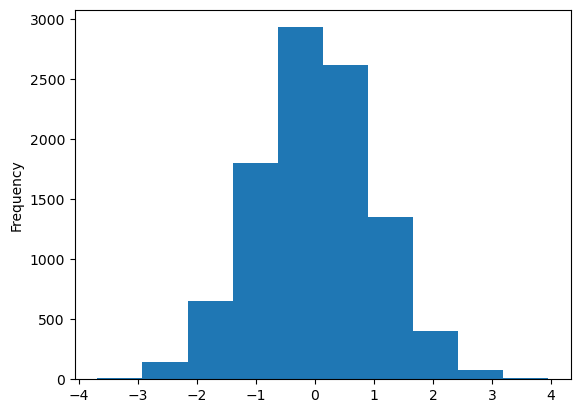

10000 Gaussian events: μ = 0.00226, σ = 1.00109


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_mean(N, show_histogram = False):
    """
    Return mean and std of N events (samples) from 
    standard Gaussian/normal distribution (mean=0, std=1).
    Optionally shows histogram if show_histogram=True.
    """
    events = np.random.randn(N)
    
    if show_histogram:
        plt.hist(events)
        plt.ylabel('Frequency')
        plt.show()
    
    return np.mean(events), np.std(events, ddof=1)

N = 10000

returned_mean, returned_std =  gaussian_mean(N, show_histogram = True)
print(f"{N} Gaussian events: μ = {returned_mean:.5f}, σ = {returned_std:.5f}")

We repeat this using `N = 100` and should note that the standard deviation (σ) remains approximately the same, but that the curve looks less smooth, and likely the mean (μ) is a bit further away from 0. What's the conclusion? The standard deviation (σ) does not change as a function of `N`, but the accuracy of the mean behaviour of our "simulation" does.

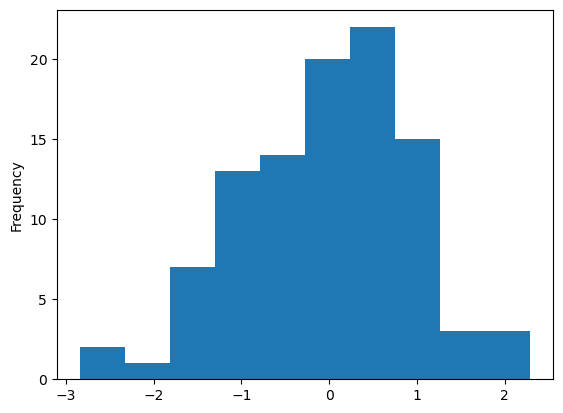

100 Gaussian events: μ = -0.03604, σ = 0.97445


In [2]:
N = 100

returned_mean, returned_std =  gaussian_mean(N, show_histogram = True)
print(f"{N} Gaussian events: μ = {returned_mean:.5f}, σ = {returned_std:.5f}")

## *2. Testing Monte Carlo accuracy, step 1*

We are going to examine how the accuracy of our `gaussian_mean(N)` varies with the number of Monte Carlo events `N` in the next section. However, to do this we want to first build a function that allows us to run multiple replications `n_replications` (commonly called trials) of `gaussian_mean(N)`. This will let us look at how much this mean varies from one replication to the next. 

Write a function `replications_mean(N, n_replications = 250)` that returns the mean and standard deviation of the means returned from `gaussian_mean(N)` when you call that function `N` times. 

We include a figure below to show an example of typical results if you call `replications_mean(100)`, leaving `n_replications` at the default value of 250 replications.

**Important!** Your function does not need to be able to produce a histogram. We include one here to help you visualize each of the 250 replications of `gaussian_mean(100)`. 

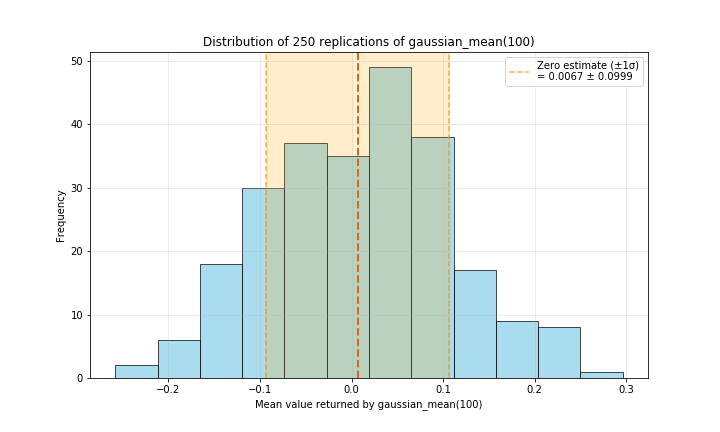

### Your solution

In [5]:
# Write your code to return the mean and standard deviation of 
# the mean returned from n_replications calls to gaussian_mean(N)

def replications_mean(N, n_replications = 250):
    data = np.array([gaussian_mean(Ni)[0] for Ni in range(1,N)])
    return np.mean(data), np.std(data)

In [6]:
# Test your solution 
# - Expected values are σ ~ 0.1 and μ ~ 0.001-0.008

N = 100

n_replications = 250
returned_mean, returned_std = replications_mean(N, n_replications)

print(f"{n_replications} replications of gaussian_mean({N}): μ = {returned_mean:.5f}, σ = {returned_std:.5f}")

250 replications of gaussian_mean(100): μ = 0.00424, σ = 0.16603


## *3. Testing Monte Carlo accuracy, step 2*

Finally, we're going to look at the accuracy of `gaussian_mean(N)` directly a funciton of Monte Carlo events `N`. 

Write a function `accuracy_graph(N_list)` with the following functionality:
1. It accepts a list or array `N_list` with all the different values of `N` at which you want to test the accuracy of `gaussian_mean(N)`.<br>E.g., `accuracy_graph( [10, 30, 100, 300, 1000, 3000, 10000] )`. 
1. In the function, for each value of `N` in `n_list` it will call the `replications_mean(N)` function for the default of `n_replications = 250` times and store the returned mean and standard deviation for plotting later. In this example it will call `replications_mean(10)`, and then `replications_mean(30)` and so on, while storing the returned values.
1. It produces an `errorbar` plot with the differnt values from  `N_list` along the x-axis, the means returned from `replications_mean(N)` as the y values and the standard deviations returned from `replications_mean(N)` as the sizes of the error bars. You can use `plt.xscale('log')` to make the x-axis logarithmic, which should make it much easier to compare values of `N` of different orders of magnitude. See the figures below for examples.
1. The function `accuracy` may take several seconds to execute. While you are developing and testing this, you may want to omit the largest couple of values of `N` to minimize computing time. 

If you are feeling ambitious, you can add the lines for the $1/\sqrt{N}$ relative uncertainty (percent error) as we have done for our example. This line represents the expected 68% Confidence Interval (1σ) for the relationship between number of events $N$ and accuracy, and you can see that it does a good job of tracing the approximate ends of the error bars, showing that accuracy of our Monte Carlo estimates does indeed have a $1/\sqrt{N}$ relationship, where $N$ is the number of events in each replication of $N$.

**Important!** Our use of `n_replications = 250` is somewhat arbitrary as we just wanted a sufficiently high number of replications to give us reproducible standard deviations. If you change `n_replications` to `100` or `2500`, you should not see significant differences in your plot since the accuracy is based on the number of events `N`, not the number of replications `n_replications`.

### Example graph (you do not need to reproduce all of the features shown)

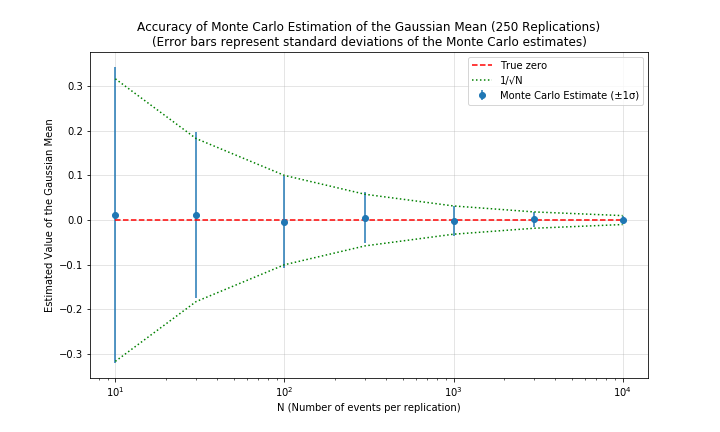

### Your solution

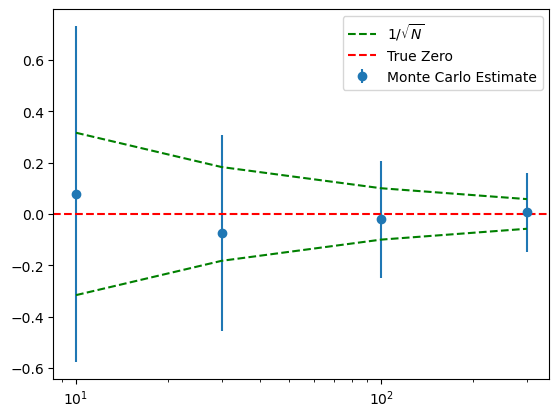

In [28]:
# Your code for accuracy_graph(N_list)
N_list = [10, 30, 100, 300] # Use this list for testing; it will run much faster
# N_list = [10, 30, 100, 300, 1000, 3000, 10000] # Use this list to produce your final plot

def accuracy_graph(N_list):
    data = np.array([replications_mean(n) for n in N_list]).transpose()
    plt.figure()
    plt.errorbar(x=N_list, y=data[0], yerr=data[1], fmt='o', label='Monte Carlo Estimate')
    plt.plot(N_list, -1/np.sqrt(N_list), color='green', linestyle='dashed')
    plt.plot(N_list, 1/np.sqrt(N_list), color='green', linestyle='dashed', label='$1/\\sqrt{N}$')
    plt.axhline(y=0,color='red',linestyle='dashed',label='True Zero')
    plt.xscale('log')
    plt.legend()
    plt.show()

accuracy_graph(N_list)

## *4. Comparing the speeds of array methods and loops using `%timeit`*

Below we show the use of the Jupyter notebook built-in magic command `%timeit` ( https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit ) to see how long it takes our `gaussian_mean()` function to execute. 

Specifically we include the following arguments:
* `-n1` and `-r1`: The two arguments combine so that it will call the function only once. By default `%timeit` will run the command you give it several times to determine averages and standard deviations for the times the function takes to run.
* `-o`: Return a `TimeitResult` object that can be stored in a variable to inspect

In [29]:
# Run me to look at how long it takes to run `gaussian_mean(1000000)
t1 = %timeit -n1 -r1 -o gaussian_mean(1000000)

50.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Now we define a function `gaussian_mean2(N)` that uses lists and a for loop instead of array operations and test how quickly it accomplishes the same task.

In [30]:
def gaussian_mean2(N):
    """
    Core gaussian_mean(N) functionality using lists instead of array operations
    """
    
    events_list = []
    
    for i in range(N):
        events_list.append(np.random.randn()) # Add one event at a time
    
    events = np.array(events_list)
    
    return np.mean(events), np.std(events, ddof=1)

In [31]:
t2 = %timeit -n1 -r1 -o gaussian_mean2(1000000)

404 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Finally, let's compare the two methods. The `TimeitResult` object has an attribute `.average` (i.e., `t1.average` and `t2.average`) that allows you to extract the mean from results objects

Perform a calculation that determines the ratio of `t2.average` to `t1.average` and then prints it to indicate how much faster the array operations are for this task than a loop. You should find it takes at least 10 times longer when we use the for loop than when we use array operations.  

Experiment with some different values of `N` with very different orders of magnitude to determine the impact of the number of operations.

### Your solution

In [45]:
nvalues = [ 1, 2, 3, 4, 5, 6 ]
def test_time(n):
    v = 10 ** n
    t1 = %timeit -n1 -r1 -o gaussian_mean(v)
    t2 = %timeit -n1 -r1 -o gaussian_mean2(v)
    return t2.average / t1.average
    
# Calculate the ratio of `t2.average` to `t1.average`
# and print it
ratio = np.mean([test_time(n) for n in nvalues])

print(f'Average t2/t1 is {ratio:.3f} s')

167 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
137 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
91.3 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
120 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
515 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
609 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
533 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
5.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.93 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
49.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
30.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
476 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Average t2/t1 is 7.649 s


## *Completing this homework and submitting it to Canvas*
Before submitting your work, restart + rerun your entire notebook to make sure that everything runs correctly and without error.

To do this:
1. **Restart & Run All:** From the "Kernel" menu to the right of the "Cell" menu, select "Restart & Run All". This will restart the python Kernel, erasing all variables currently stored in memory so that when you "Run All" cells, you can ensure that if you were to run your notebook again on a later day, it would run as intended.
1. Look through the whole notebook and make sure there are no errors. Many questions have purposeful errors in the distributed version so make sure you have fixed them all such that "Restart & Run All" will run through the whole book and successfully print "The notebook ran without errors" at the end. If you have any trouble resolving the errors, please ask one of your classmates or ask us in class or on Piazza.

**Export notebook as HTML:** After you've executed and checked your notebook, choose: File => Save_and_Export_Notebook_As => HTML. This will download an HTML version of your notebook to your computer. This version is can not be executed or modified. You may need to disable any pop-up blockers to allow the file to be downloaded.

**Submit to Canvas:** Submit the html file that you just downloaded to the appropriate Solo Worksheet submission on Canvas.